In [164]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

# Shelter Outcomes
We are given a dataset from the Austin Animal Center with pet intake information. The goal is to predict the outcome for each animal to help the shelter identify which specific animals could use extra focus to help ensure a positive outcome.

Let's first read in the datasets and combine into a single DataFrame

In [165]:
train = pd.read_csv('train.csv')
train.drop('AnimalID', inplace=True, axis=1)
test = pd.read_csv('test.csv')
test.drop('ID', inplace=True, axis=1)
df = pd.concat([train, test], ignore_index=True)
df.head()

,AgeuponOutcome,AnimalType,Breed,Color,DateTime,Name,OutcomeSubtype,OutcomeType,SexuponOutcome
0,1 year,Dog,Shetland Sheepdog Mix,Brown/White,2014-02-12 18:22:00,Hambone,NaN,Return_to_owner,Neutered Male
1,1 year,Cat,Domestic Shorthair Mix,Cream Tabby,2013-10-13 12:44:00,Emily,Suffering,Euthanasia,Spayed Female
2,2 years,Dog,Pit Bull Mix,Blue/White,2015-01-31 12:28:00,Pearce,Foster,Adoption,Neutered Male
3,3 weeks,Cat,Domestic Shorthair Mix,Blue Cream,2014-07-11 19:09:00,NaN,Partner,Transfer,Intact Male
4,2 years,Dog,Lhasa Apso/Miniature Poodle,Tan,2013-11-15 12:52:00,NaN,Partner,Transfer,Neutered Male


## Seasonal Trends
Grouping by month, we can see that there is a strong trend in the cat population but very little in the dog population. It seems that the total number of animals greatly increases in the summer months for cats.

In [166]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['YearMonth'] = df['DateTime'].dt.strftime('%Y-%m')

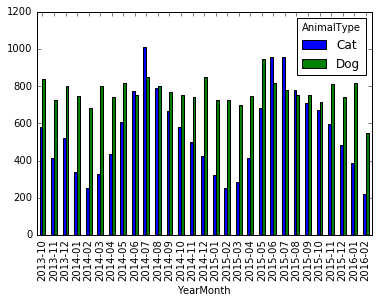

In [167]:
df.groupby(['YearMonth', 'AnimalType']).size().unstack().plot(kind='bar')

Let's look further and see what type of outcomes these were for each animal type.

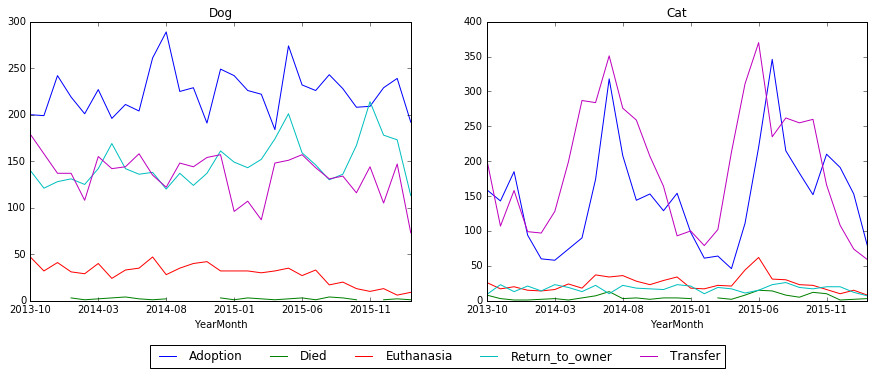

In [168]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
for ax, animal in zip(axs, df['AnimalType'].unique()):
    df[df['AnimalType']==animal].groupby(['YearMonth', 'OutcomeType']).size().unstack().plot(kind='line', ax=ax, 
                                                                                             title=animal, legend=False)
axs[0].legend(loc='center left', bbox_to_anchor=(0.3, -.2), ncol=5)

We see no real trends for dogs, but see that in the summer adoptions and transfers spiked for cats.

## Animal Age
To pull out animal age, we need to process the strings given in AgeUponOutcome. Since ages are only given using a single term in the list of week, month, week and day, we will unfortunately have different resolutions across our range.

In [169]:
def yearFromString(s):
    if pd.isnull(s): return s
    words = s.split()
    scale = 0
    if 'year' in words[1]:
        scale = 1
    elif 'month' in words[1]:
        scale = 12
    elif 'week' in words[1]:
        scale = 52
    elif 'day' in words[1]:
        scale = 365
    return float(words[0])/scale
df['Age'] = df['AgeuponOutcome'].apply(yearFromString)

AnimalType
Cat    Axes(0.125,0.125;0.775x0.775)
Dog    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

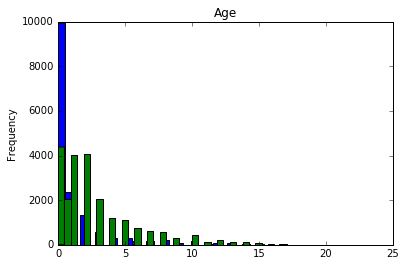

In [170]:
df.groupby('AnimalType')['Age'].plot(kind='hist', bins=40, title='Age')

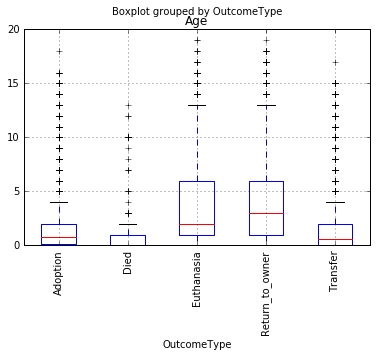

In [171]:
df.boxplot(column='Age', by='OutcomeType', rot=90)